In [1]:
import numpy as np
import random
from scipy.spatial.distance import cdist
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fuzzy C means

Desenvolvimento de cada um dos passos necessarios para o algoritmo Fuzzy c means. O passo a passo descrito abaixo, foi feito de acordo com o livro NEURO-FUZZY AND SOFT COMPUTING.

### Step 1

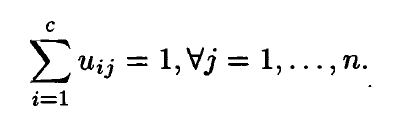

In [3]:
def membershipMatrixU(num_centroids, num_data):
    membership_matrix = np.zeros((num_centroids, num_data))
    for line in range(num_centroids):
        for column in range(num_data):
            membership_matrix[line, column] = np.random.uniform(0, 1)
    membership_matrix = np.transpose(membership_matrix)
    for column in range(num_data):
        membership_matrix[column] = membership_matrix[column]/sum(membership_matrix[column])

    return np.transpose(membership_matrix)

### Step 2

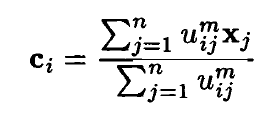

In [4]:
def calculateClusterCenters(membership_matrix, dataset, m):
    num_centroids = membership_matrix.shape[0]
    num_coord = dataset.shape[1]
    centroids = np.zeros([num_centroids, num_coord])

    for pos_center in range(num_centroids):
        centroids[pos_center] = (membership_matrix[pos_center,:] ** m).dot(dataset)/sum(membership_matrix[pos_center,:] ** m)
        
    return np.array(centroids)

### Step 3

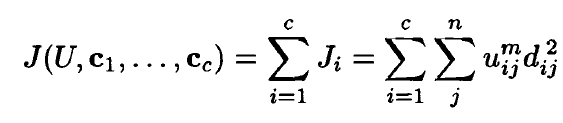

In [7]:
def euclideanDistance(dataset, centroids):
    return np.transpose(cdist(dataset, centroids, 'euclidean'))

In [8]:
def costFunction(membership_matrix, euclidean_distance_matrix, m):
    num_centroids = membership_matrix.shape[0]
    num_data = membership_matrix.shape[1]
    cost = 0
    for pos_center in range(num_centroids):
        for pos_data in range(num_data):
            cost += (membership_matrix[pos_center, pos_data] ** m) * (euclidean_distance_matrix[pos_center, pos_data] ** 2)
            
    return cost

### Step 4

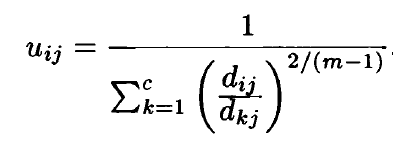

In [9]:
def updateMembershipMatrixU(euclidean_distance_matrix, m):
    num_centroids = euclidean_distance_matrix.shape[0]
    num_data = euclidean_distance_matrix.shape[1]
    membership_matrix = np.zeros((num_centroids, num_data))

    for pos_center_i in range(num_centroids):
        for pos_data in range(num_data):
            somatorio = 0
            for pos_center_k in range(num_centroids):
                somatorio += (euclidean_distance_matrix[pos_center_i, pos_data] / euclidean_distance_matrix[pos_center_k, pos_data]) ** (2/(m-1))
            membership_matrix[pos_center_i, pos_data] = 1/somatorio
    
    return membership_matrix   

### Fuzzy c means

In [10]:
def fuzzy_c_means(dataset, num_centroids, max_iterations=20, m=2):
    membership_matrix_u = membershipMatrixU(num_centroids, len(dataset))
    cost = 1
    iterations = 0
    while cost != 0 and iterations < max_iterations:
        print('Interação: '+str(iterations+1))
        centroids = calculateClusterCenters(membership_matrix_u, dataset, m)
        euclidean_distance_matrix = euclideanDistance(dataset, centroids)
        cost = costFunction(membership_matrix_u, euclidean_distance_matrix, m)
        membership_matrix_u = updateMembershipMatrixU(euclidean_distance_matrix, m)
        print('Custo: '+ str(cost))
        iterations += 1
    
    return [centroids, membership_matrix_u, iterations, cost]

## Validação do FCM

### Carrega e apresenta os dados

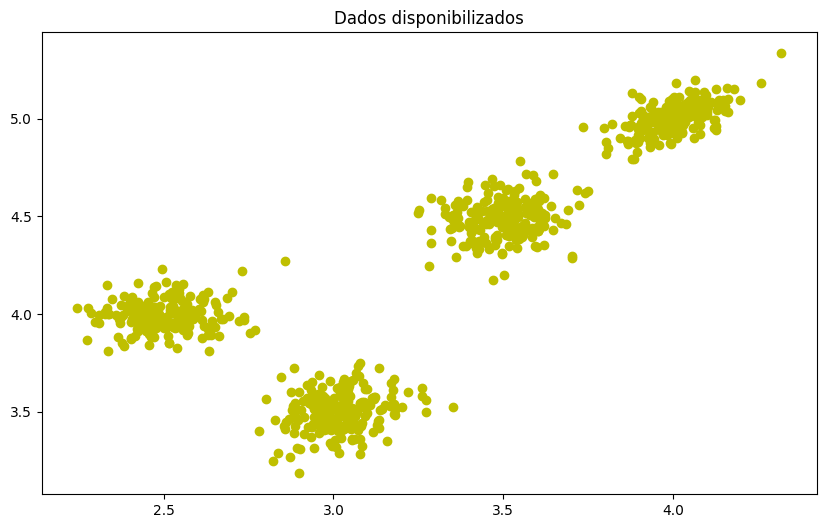

In [13]:
dataset = loadmat('fcm_dataset.mat')
dataset = pd.DataFrame(dataset['x'])
dataset_values = dataset.values
plt.figure(figsize=(10, 6))
plt.title("Dados disponibilizados")
for i in range(len(dataset_values)):
        plt.scatter(dataset_values[i][0], dataset_values[i][1], c="y")

### Utilizando o FCM

In [14]:
result = fuzzy_c_means(dataset = dataset_values, num_centroids = 4, max_iterations = 100)

Interação: 1
Custo: 166.43230424509525
Interação: 2
Custo: 126.29352453804928
Interação: 3
Custo: 112.59066271676149
Interação: 4
Custo: 70.11716524584928
Interação: 5
Custo: 53.02205248972711
Interação: 6
Custo: 42.883571994317194
Interação: 7
Custo: 17.173648340123062
Interação: 8
Custo: 12.496525408182034
Interação: 9
Custo: 12.43423959793348
Interação: 10
Custo: 12.433505476799613
Interação: 11
Custo: 12.43349473221751
Interação: 12
Custo: 12.433494532647508
Interação: 13
Custo: 12.433494528289422
Interação: 14
Custo: 12.433494528186081
Interação: 15
Custo: 12.43349452818352
Interação: 16
Custo: 12.433494528183415
Interação: 17
Custo: 12.433494528183438
Interação: 18
Custo: 12.433494528183415
Interação: 19
Custo: 12.433494528183443
Interação: 20
Custo: 12.433494528183468
Interação: 21
Custo: 12.433494528183463
Interação: 22
Custo: 12.433494528183475
Interação: 23
Custo: 12.433494528183468
Interação: 24
Custo: 12.433494528183434
Interação: 25
Custo: 12.433494528183452
Interação: 26


### Exposição do resultado FCM

In [15]:
centroids = result[0]
membership_m_u = result[1]
iterations = result[2]
cost = result[3]
print("Com {} iterações, foi possivel obter custo {}".format(iterations, cost))

Com 100 iterações, foi possivel obter custo 12.433494528183438


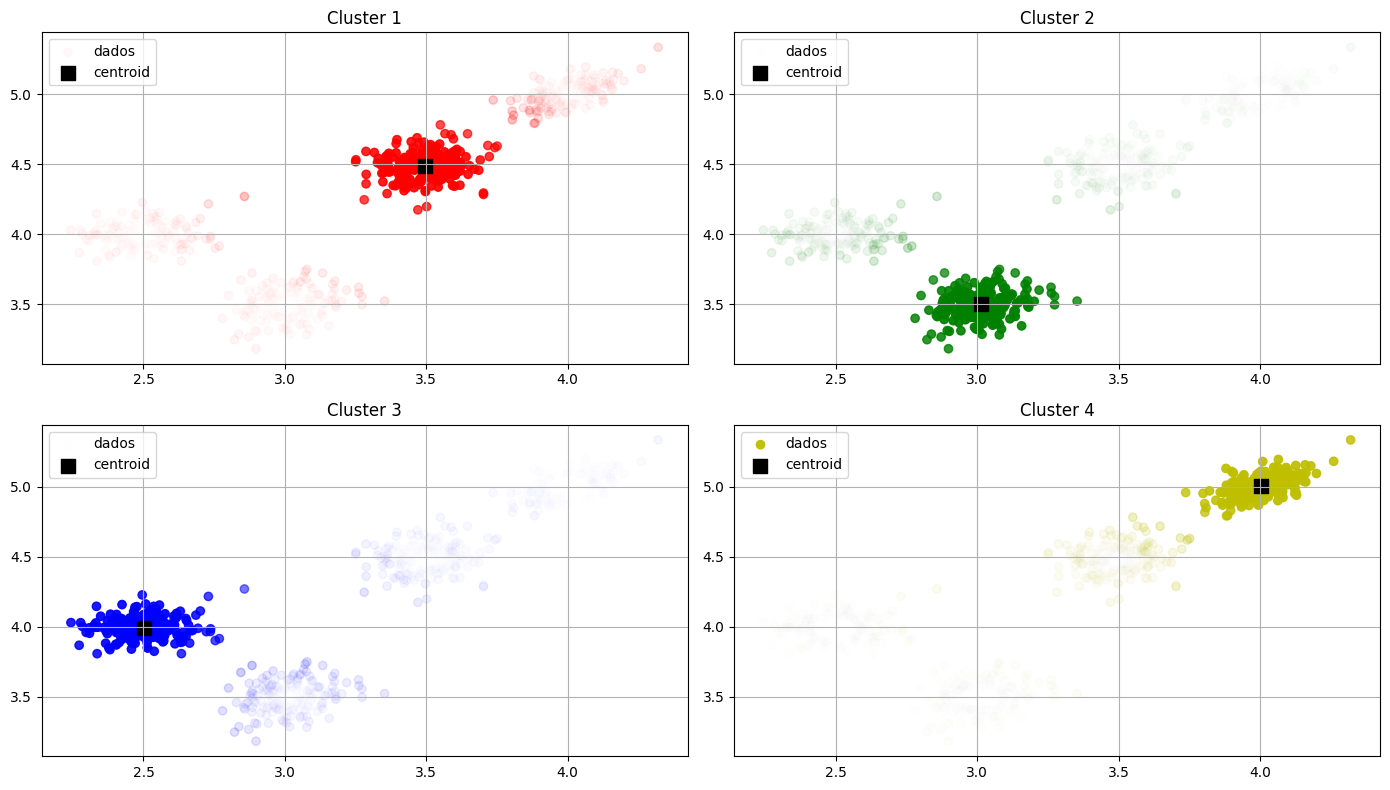

In [16]:
cores = ['r', 'g', 'b', 'y']
plt.figure(figsize=(14, 8))
for n_center in range(len(centroids)):
    plt.subplot(2, 2, (n_center+1))
    plt.title('Cluster '+str((n_center+1)))
    plt.scatter(dataset_values[:,0], dataset_values[:,1], c=cores[n_center], alpha=membership_m_u[n_center])
    plt.scatter(centroids[n_center][0], centroids[n_center][1], c='k', s=100, marker="s")
    plt.legend(['dados', 'centroid'])
    plt.grid()
plt.tight_layout()
plt.show()

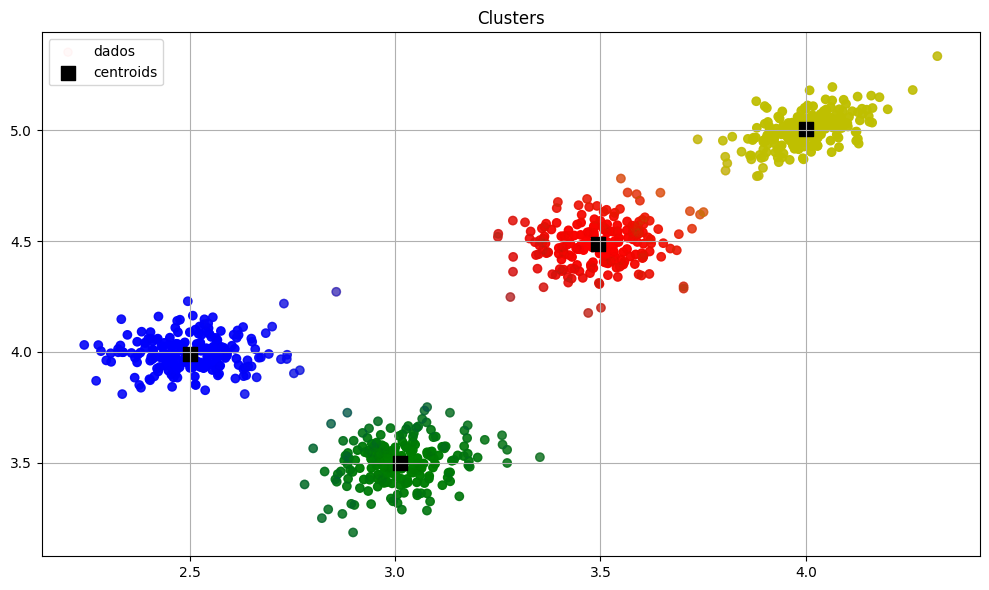

In [17]:
cores = ['r', 'g', 'b', 'y']
plt.figure(figsize=(10, 6))
plt.title('Clusters')
for n_center in range(len(centroids)):
    plt.scatter(dataset_values[:,0], dataset_values[:,1], c=cores[n_center], alpha=membership_m_u[n_center])
    plt.scatter(centroids[n_center][0], centroids[n_center][1], c='k', s=100, marker="s")
    plt.legend(['dados', 'centroids'])
plt.grid()
plt.tight_layout()
plt.show()

## Segmentação de imagens por região